<a href="https://colab.research.google.com/github/jonathanmendoza-tx/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Jonathan_Mendoza_LS_DS6_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 132
## Sampling, Confidence Intervals, and Hypothesis Testing

# Lecture

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=51.232012727061075, pvalue=7.500838035734877e-12)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

In [0]:
from scipy.stats import ttest_ind

?ttest_ind

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n = 3000
sample_means = []
for x in range(0,n):
  coinflips = np.random.binomial(n=1, p=.5, size=100)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.62, 0.51, 0.5, 0.47, 0.55, 0.48, 0.48, 0.52, 0.46, 0.55, 0.54, 0.49, 0.56, 0.54, 0.56, 0.41, 0.53, 0.51, 0.49, 0.61, 0.53, 0.57, 0.52, 0.53, 0.52, 0.62, 0.48, 0.48, 0.54, 0.44, 0.5, 0.46, 0.55, 0.53, 0.55, 0.46, 0.56, 0.52, 0.48, 0.5, 0.47, 0.39, 0.56, 0.52, 0.54, 0.42, 0.54, 0.54, 0.48, 0.51, 0.51, 0.43, 0.57, 0.42, 0.56, 0.45, 0.57, 0.5, 0.37, 0.5, 0.6, 0.51, 0.51, 0.43, 0.54, 0.46, 0.55, 0.49, 0.52, 0.46, 0.49, 0.48, 0.52, 0.53, 0.53, 0.4, 0.47, 0.51, 0.58, 0.5, 0.4, 0.51, 0.46, 0.49, 0.53, 0.48, 0.45, 0.49, 0.54, 0.53, 0.5, 0.53, 0.51, 0.56, 0.55, 0.53, 0.44, 0.59, 0.49, 0.35, 0.45, 0.46, 0.46, 0.58, 0.51, 0.57, 0.56, 0.47, 0.52, 0.5, 0.44, 0.55, 0.47, 0.49, 0.55, 0.45, 0.65, 0.54, 0.45, 0.54, 0.4, 0.43, 0.49, 0.51, 0.47, 0.53, 0.45, 0.65, 0.53, 0.55, 0.42, 0.6, 0.57, 0.43, 0.46, 0.46, 0.52, 0.5, 0.56, 0.61, 0.58, 0.47, 0.53, 0.51, 0.5, 0.47, 0.46, 0.41, 0.46, 0.58, 0.45, 0.45, 0.49, 0.5, 0.42, 0.61, 0.52, 0.42, 0.52, 0.51, 0.57, 0.46, 0.43, 0.49, 0.44, 0.41, 0.53, 0.46, 0.

In [0]:
# Create dataframe with single coin flip
df = pd.DataFrame({'one_samp':one_sample})
df.head()

,one_samp
0,1
1,0
2,1
3,1
4,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9a8bba128>]],
      dtype=object)

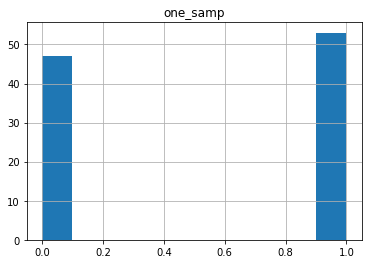

In [0]:
# Plot histogram to look at distribution of a single coin flip 
df.hist()

Text(0.5, 1.0, 'Distribution of 3000 sample means \n (of 100 coinflips each)')

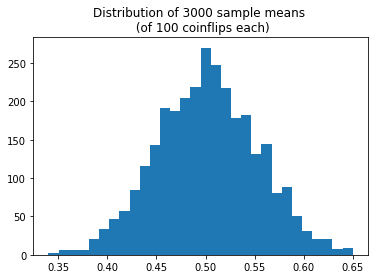

In [0]:
# Plot histogram to look at distribution of all coin flips
ax = plt.hist(sample_means, bins = 30)
plt.title(f'Distribution of {n} sample means \n (of 100 coinflips each)')

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

In [0]:
import numpy as np
import pandas as pd

# Average Height
mu = 70
sigma = 3

lambda_heights = np.random.normal(mu, sigma, 2000)
print(len(lambda_heights))
lambda_heights

2000


array([73.66325563, 69.379304  , 69.49098013, ..., 69.1792493 ,
       69.5770137 , 72.26449348])

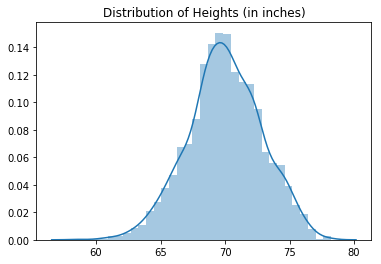

In [0]:
import seaborn as sns

sns.distplot(lambda_heights)
plt.title('Distribution of Heights (in inches)');

In [0]:
print("Population Mean:", lambda_heights.mean())
print("Population Standard Deviation:", lambda_heights.std())

Population Mean: 69.98602697779678
Population Standard Deviation: 2.874010733408123


In [0]:
population = pd.DataFrame({'heights': lambda_heights})
print(population.shape)
population.head()

(2000, 1)


,heights
0,73.663256
1,69.379304
2,69.490980
3,75.881974
4,70.853957


In [0]:
# Take a random sample and print sample mean
sample1 = population.sample(100)
print(sample1.shape)
print(sample1.mean())
sample1.head()

(100, 1)
heights    70.188529
dtype: float64


,heights
942,69.975527
802,71.264461
558,69.247328
1446,72.955760
1642,68.762733


In [0]:
# Take a different random sample and print sample mean
sample2 = population.sample(100)
print(sample2.shape)
print(sample2.mean())
sample2.head()

(100, 1)
heights    70.353541
dtype: float64


,heights
1613,71.422286
1050,71.881805
360,71.369934
1357,68.934449
83,73.092343


## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
coinflips_100 = np.random.binomial(n =1,p = 0.5, size =100)
sample_std = np.std(coinflips_100)
print('sample st dev:', sample_std)
sample_size = len(coinflips_100)
print('sample_size:',sample_size)

sample st dev: 0.49909918853871116
sample_size: 100


In [0]:
std_err = sample_std/np.sqrt(sample_size)
print(std_err)

0.04990991885387112


### What confidence level do we want our confidence interval to represent?

95% confidence Interval? 99% confidence interval? 

In [0]:
import scipy.stats as stats
help(stats.t.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



In [0]:
t = stats.t.ppf(0.975, sample_size-1)
t

1.9842169515086827

In [0]:
sample_mean = coinflips_100.mean()
confidence_int = (sample_mean - t*std_err, sample_mean+t*std_err)
margin_of_err = t*std_err

print('sample_mean:',sample_mean)
print('confidence_int:',confidence_int)
print('margin_of_err:',margin_of_err)

sample_mean: 0.53
confidence_int: (0.43096789296172616, 0.629032107038274)
margin_of_err: 0.09903210703827388


## Graphically Represent a Confidence Interval

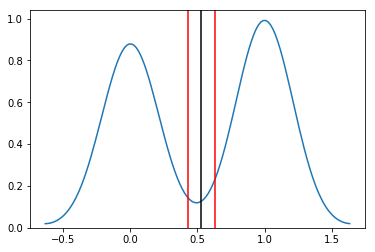

In [0]:
import seaborn as sns

sns.kdeplot(coinflips_100)
plt.axvline(x= sample_mean, color = 'k')
plt.axvline(x= confidence_int[0], color = 'r')
plt.axvline(x= confidence_int[1], color = 'r')

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [0]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.4, 0.5333333333333333, 0.5, 0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.43333333333333335, 0.4, 0.5666666666666667, 0.5, 0.4, 0.5, 0.5, 0.36666666666666664, 0.4666666666666667, 0.4666666666666667, 0.5666666666666667, 0.5, 0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.43333333333333335, 0.43333333333333335, 0.5666666666666667, 0.5, 0.6, 0.5333333333333333, 0.6, 0.4, 0.36666666666666664, 0.5, 0.5, 0.4666666666666667, 0.5, 0.36666666666666664, 0.36666666666666664, 0.4, 0.4, 0.5, 0.43333333333333335, 0.5333333333333333, 0.5333333333333333, 0.5666666666666667, 0.43333333333333335, 0.43333333333333335, 0.4, 0.5666666666666667, 0.5, 0.4, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.43333333333333335, 0.5666666666666667, 0.43333333333333335, 0.6666666666666666, 0.5, 0.5666666666666667, 0.5, 0.6, 0.5666666666666667, 0.4666666666666667, 0.4, 0.6, 0.6, 0.4333333333

In [0]:
t_stat = stats.t.ppf(0.975, 99)
print('T Statistic:',t_stat)

std_sample = np.std(coinflip_means)
std_error = std_sample/np.sqrt(len(coinflip_means))
CI = stats.t.interval(0.95,99, loc = np.mean(coinflip_means),scale = std_error)
print('95% confidence interval:',CI)


T Statistic: 1.9842169515086827
95% confidence interval: (0.48551702341748093, 0.5171496432491857)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
ttest_1samp(coinflip_means, 0.5)

Ttest_1sampResult(statistic=0.16643333788549555, pvalue=0.868155385669968)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
ttest_1samp(coinflip_means, 0.52) # pvalue lower than .05

Ttest_1sampResult(statistic=-2.3300667303970073, pvalue=0.021832800115831913)

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.describe(exclude = 'number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


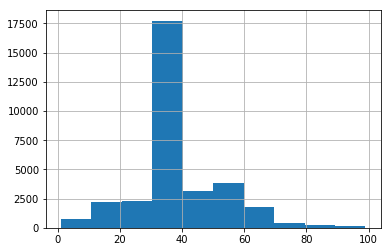

In [0]:
df['hours-per-week'].hist()

In [0]:
cut_points = [0,20,40,60,150]
labels_names = ['0-20', '21-40','41-60','61+']
df['hours_per_week_bin'] = pd.cut(df['hours-per-week'], cut_points, labels = labels_names)
df.hours_per_week_bin.value_counts()

21-40    20052
41-60     8471
0-20      2928
61+       1110
Name: hours_per_week_bin, dtype: int64

In [0]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
df = df.sort_values(by = 'hours_per_week_bin')
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_bin'], margins = True)
contingency_table

hours_per_week_bin,0-20,21-40,41-60,61+,All
sex,,,,,
Female,1550,7479,1571,171,10771
Male,1378,12573,6900,939,21790
All,2928,20052,8471,1110,32561


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
row_sums = contingency_table.iloc[0:2,4].values
col_sums = contingency_table.iloc[2, 0:4].values
print(row_sums)
print(col_sums)

[10771 21790]
[ 2928 20052  8471  1110]


In [0]:
total = contingency_table.loc['All','All']
total

32561

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 4)
[[  968.56632167  6633.09148982  2802.16028378   367.18190473]
 [ 1959.43367833 13418.90851018  5668.83971622   742.81809527]]


## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
observed = pd.crosstab(df['sex'], df['hours_per_week_bin']).values
print(observed.shape)
observed


(2, 4)


array([[ 1550,  7479,  1571,   171],
       [ 1378, 12573,  6900,   939]])

In [0]:
chi_sq = ((observed-expected)**2/(expected)).sum()
chi_sq ## high value indicates null hypothesis cannot be rejected

1647.7095128222354

## Run a $\chi^{2}$ Test using Scipy

In [0]:
help(stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [0]:
chi_sqrd, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_sqrd, p_value, dof, expected)

1647.7095128222354 0.0 3 [[  968.56632167  6633.09148982  2802.16028378   367.18190473]
 [ 1959.43367833 13418.90851018  5668.83971622   742.81809527]]


Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex. 

# Assignment

## Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

### Load and clean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

cols = ['class','handicapped_infants','water_proj_costshare','adopt_budget_res',
        'physician_fee_frz','el_salvador_aid','religious_grps_in_schools',
        'anti_sat_test_ban','nicaraguan_contras_aid','mx_missle','immigration',
        'synfuels_corp_cutback','edu_spending','superfund_right_to_sue','crime',
        'duty_free_export','south_africa_export_admin_act']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header = None , na_values = '?', names = cols)

df.fillna(value = 0, inplace = True)
df.replace(to_replace = {'y':1,'n':-1}, inplace = True)

print(df.shape)
df.head()

(435, 17)


,class,handicapped_infants,water_proj_costshare,adopt_budget_res,physician_fee_frz,el_salvador_aid,religious_grps_in_schools,anti_sat_test_ban,nicaraguan_contras_aid,mx_missle,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_export,south_africa_export_admin_act
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


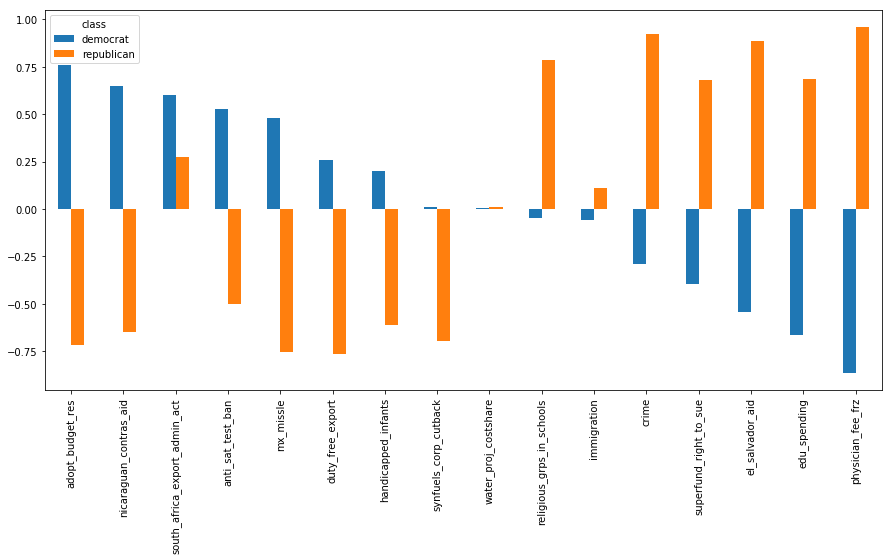

In [2]:
df_mean = df.groupby('class').mean().T.sort_values(by = 'democrat', ascending = False)
df_mean.plot.bar(figsize =(15,7))

In [0]:
df_mean.T

,adopt_budget_res,nicaraguan_contras_aid,south_africa_export_admin_act,anti_sat_test_ban,mx_missle,duty_free_export,handicapped_infants,synfuels_corp_cutback,water_proj_costshare,religious_grps_in_schools,immigration,crime,superfund_right_to_sue,el_salvador_aid,edu_spending,physician_fee_frz
class,,,,,,,,,,,,,,,,
democrat,0.756554,0.64794,0.602996,0.52809,0.479401,0.258427,0.202247,0.011236,0.003745,-0.044944,-0.056180,-0.288390,-0.397004,-0.543071,-0.662921,-0.865169
republican,-0.714286,-0.64881,0.273810,-0.50000,-0.755952,-0.761905,-0.613095,-0.696429,0.011905,0.785714,0.113095,0.922619,0.678571,0.886905,0.684524,0.958333


In [3]:
df_size = df['class'].value_counts().values
df_size

array([267, 168])

In [4]:
df_std = df.groupby('class').std()
df_std

,handicapped_infants,water_proj_costshare,adopt_budget_res,physician_fee_frz,el_salvador_aid,religious_grps_in_schools,anti_sat_test_ban,nicaraguan_contras_aid,mx_missle,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_export,south_africa_export_admin_act
class,,,,,,,,,,,,,,,,
democrat,0.963778,0.947883,0.634758,0.471544,0.814010,0.983818,0.832921,0.753205,0.837641,0.992751,0.979040,0.703543,0.888349,0.939513,0.936255,0.574906
republican,0.780953,0.941321,0.684673,0.253223,0.443524,0.610711,0.847681,0.718780,0.642758,0.987500,0.681307,0.675844,0.694904,0.328251,0.591741,0.893773


In [5]:
df_republican_std_err = df_std[1:]/np.sqrt(df_size[1])
df_republican_std_err


,handicapped_infants,water_proj_costshare,adopt_budget_res,physician_fee_frz,el_salvador_aid,religious_grps_in_schools,anti_sat_test_ban,nicaraguan_contras_aid,mx_missle,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_export,south_africa_export_admin_act
class,,,,,,,,,,,,,,,,
republican,0.060252,0.072624,0.052824,0.019537,0.034219,0.047117,0.0654,0.055455,0.04959,0.076187,0.052564,0.052142,0.053613,0.025325,0.045654,0.068956


In [6]:
df_democrat_std_err = df_std[:1]/np.sqrt(df_size[0])
df_democrat_std_err

,handicapped_infants,water_proj_costshare,adopt_budget_res,physician_fee_frz,el_salvador_aid,religious_grps_in_schools,anti_sat_test_ban,nicaraguan_contras_aid,mx_missle,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_export,south_africa_export_admin_act
class,,,,,,,,,,,,,,,,
democrat,0.058982,0.058009,0.038847,0.028858,0.049817,0.060209,0.050974,0.046095,0.051263,0.060755,0.059916,0.043056,0.054366,0.057497,0.057298,0.035184


In [7]:
t_dem = stats.t.ppf(0.975, df_size[0]-1)
t_rep = stats.t.ppf(0.975, df_size[1]-1)

confidence_int_rep = (df_mean.T[1:] - t_rep*df_republican_std_err, df_mean.T[1:]+t_rep*df_republican_std_err)
confidence_int_rep[0]

,adopt_budget_res,anti_sat_test_ban,crime,duty_free_export,edu_spending,el_salvador_aid,handicapped_infants,immigration,mx_missle,nicaraguan_contras_aid,physician_fee_frz,religious_grps_in_schools,south_africa_export_admin_act,superfund_right_to_sue,synfuels_corp_cutback,water_proj_costshare
class,,,,,,,,,,,,,,,,
republican,-0.818574,-0.629117,0.87262,-0.852038,0.58158,0.819348,-0.732049,-0.037319,-0.853856,-0.758293,0.919763,0.692692,0.137671,0.572725,-0.800204,-0.131476


In [8]:
confidence_int_rep[1]

,adopt_budget_res,anti_sat_test_ban,crime,duty_free_export,edu_spending,el_salvador_aid,handicapped_infants,immigration,mx_missle,nicaraguan_contras_aid,physician_fee_frz,religious_grps_in_schools,south_africa_export_admin_act,superfund_right_to_sue,synfuels_corp_cutback,water_proj_costshare
class,,,,,,,,,,,,,,,,
republican,-0.609998,-0.370883,0.972618,-0.671772,0.787467,0.954462,-0.494142,0.26351,-0.658049,-0.539326,0.996904,0.878737,0.409948,0.784418,-0.592653,0.155285


In [9]:
CI = stats.t.interval(0.95,99, loc = df_mean.T[1:] ,scale = df_republican_std_err)
CI

(array([[-0.8338384 , -0.79291225,  0.16899595, -0.53876477, -0.82384958,
         -0.85539591, -0.74286303, -0.80646355, -0.08649229,  0.63454215,
          0.00879696,  0.81915703,  0.57219161,  0.83665422,  0.59393682,
          0.82150944]]),
 array([[-0.59473303, -0.5047068 ,  0.3786231 , -0.46123523, -0.68805519,
         -0.66841361, -0.48332745, -0.5863936 ,  0.11030181,  0.93688642,
          0.21739352,  1.02608107,  0.78495124,  0.9371553 ,  0.7751108 ,
          1.09515723]]))

In [10]:
df[df['class'] == 'republican']['adopt_budget_res'].value_counts()

-1    142
 1     22
 0      4
Name: adopt_budget_res, dtype: int64

[Text(0, 0, 'No'), Text(0, 0, 'Abstain'), Text(0, 0, 'Yes')]

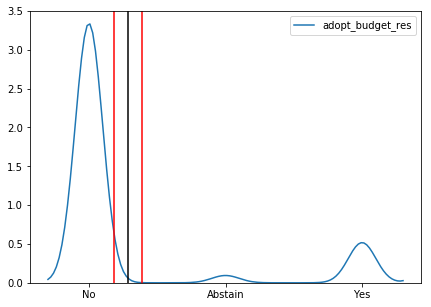

In [11]:

fig, ax = plt.subplots(figsize = (7,5))
sns.kdeplot(df[df['class'] == 'republican']['adopt_budget_res'], bw = .1)
plt.axvline(x= df_mean.T['adopt_budget_res'][1] , color = 'k')
plt.axvline(x= confidence_int_rep[0]['adopt_budget_res'][0], color = 'r')
plt.axvline(x= confidence_int_rep[1]['adopt_budget_res'][0], color = 'r')
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['No','Abstain','Yes'])

the confidence interval tells us that the likelyhood of a 'no' vote is high in the case of a republican's vote for adopting the budget resolution

## Chi Squared 

### Numpy version

In [13]:
df_persons = pd.read_csv('https://raw.githubusercontent.com/jmend01/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

print(df_persons.shape) #checking out the data
print(df_persons.info())
df_persons.head()

(1200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
Unnamed: 0       1200 non-null int64
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(4)
memory usage: 37.6 KB
None


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [34]:
label_e = ['0','1-30','31-50','51-70','71-100','101-150','151-200','201-250','251-300']
df_persons['ex_bins'] = pd.cut(df_persons['exercise_time'],[-.1,0,30,50,70,100,150,200,250,300], labels = label_e )
df_persons.ex_bins.value_counts()

101-150    194
151-200    190
71-100     167
251-300    156
201-250    155
1-30       147
51-70       97
31-50       92
0            2
Name: ex_bins, dtype: int64

In [35]:
label_w = ['100-120','121-140','141-160','161-180','181-200','201-250']
df_persons['wt_bins'] = pd.cut(df_persons['weight'], [99,120,140,160,180,200,250], labels = label_w)
df_persons['wt_bins'].value_counts()


121-140    269
100-120    246
141-160    217
161-180    168
181-200    152
201-250    148
Name: wt_bins, dtype: int64

In [49]:
df_persons = df_persons.sort_values(by = 'ex_bins')
contingency_table = pd.crosstab(df_persons['ex_bins'],df_persons['wt_bins'],margins = True)
contingency_table

wt_bins,100-120,121-140,141-160,161-180,181-200,201-250,All
ex_bins,,,,,,,
0,0,0,0,0,1,1,2
1-30,19,14,19,14,30,51,147
31-50,10,14,10,14,14,30,92
51-70,18,11,10,21,12,25,97
71-100,15,29,34,33,27,29,167
101-150,41,34,30,34,43,12,194
151-200,43,50,42,30,25,0,190
201-250,39,57,39,20,0,0,155
251-300,61,60,33,2,0,0,156


In [70]:
df_persons = df_persons.sort_values(by = 'wt_bins') #had to sort twice because there is a crosstab margins bug where it does not sort margins correctly
contingency_table2 = pd.crosstab(df_persons['ex_bins'],df_persons['wt_bins'],margins = True)
contingency_table2

wt_bins,100-120,121-140,141-160,161-180,181-200,201-250,All
ex_bins,,,,,,,
0,0,0,0,0,1,1,156
1-30,19,14,19,14,30,51,155
31-50,10,14,10,14,14,30,190
51-70,18,11,10,21,12,25,97
71-100,15,29,34,33,27,29,167
101-150,41,34,30,34,43,12,147
151-200,43,50,42,30,25,0,92
201-250,39,57,39,20,0,0,194
251-300,61,60,33,2,0,0,2


In [58]:
row_sums = contingency_table.iloc[0:9,6].values
col_sums = contingency_table2.iloc[9, 0:6].values
print(row_sums)
print(col_sums)

[  2 147  92  97 167 194 190 155 156]
[246 269 217 168 152 148]


In [59]:
total = contingency_table.loc['All','All']
total

1200

In [61]:
expected_persons = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected_persons.append(expected_row)
  
expected_persons = np.array(expected_persons)
print(expected_persons.shape)
print(expected_persons)

(9, 6)
[[ 0.41        0.44833333  0.36166667  0.28        0.25333333  0.24666667]
 [30.135      32.9525     26.5825     20.58       18.62       18.13      ]
 [18.86       20.62333333 16.63666667 12.88       11.65333333 11.34666667]
 [19.885      21.74416667 17.54083333 13.58       12.28666667 11.96333333]
 [34.235      37.43583333 30.19916667 23.38       21.15333333 20.59666667]
 [39.77       43.48833333 35.08166667 27.16       24.57333333 23.92666667]
 [38.95       42.59166667 34.35833333 26.6        24.06666667 23.43333333]
 [31.775      34.74583333 28.02916667 21.7        19.63333333 19.11666667]
 [31.98       34.97       28.21       21.84       19.76       19.24      ]]


In [63]:

observed_persons = pd.crosstab(df_persons['ex_bins'],df_persons['wt_bins']).values
print(observed_persons.shape)
observed_persons


(9, 6)


array([[ 0,  0,  0,  0,  1,  1],
       [19, 14, 19, 14, 30, 51],
       [10, 14, 10, 14, 14, 30],
       [18, 11, 10, 21, 12, 25],
       [15, 29, 34, 33, 27, 29],
       [41, 34, 30, 34, 43, 12],
       [43, 50, 42, 30, 25,  0],
       [39, 57, 39, 20,  0,  0],
       [61, 60, 33,  2,  0,  0]])

In [64]:
chi_sq = ((observed_persons-expected_persons)**2/(expected_persons)).sum()
chi_sq ## high value indicates null hypothesis cannot be rejected

393.99200788016634

### Scipy

In [66]:
chi_sqrd, p_value, dof, expected = stats.chi2_contingency(observed_persons)
print(chi_sqrd,'\n', p_value,'\n', dof,'\n', expected)

393.99200788016634 
 9.979500326291932e-60 
 40 
 [[ 0.41        0.44833333  0.36166667  0.28        0.25333333  0.24666667]
 [30.135      32.9525     26.5825     20.58       18.62       18.13      ]
 [18.86       20.62333333 16.63666667 12.88       11.65333333 11.34666667]
 [19.885      21.74416667 17.54083333 13.58       12.28666667 11.96333333]
 [34.235      37.43583333 30.19916667 23.38       21.15333333 20.59666667]
 [39.77       43.48833333 35.08166667 27.16       24.57333333 23.92666667]
 [38.95       42.59166667 34.35833333 26.6        24.06666667 23.43333333]
 [31.775      34.74583333 28.02916667 21.7        19.63333333 19.11666667]
 [31.98       34.97       28.21       21.84       19.76       19.24      ]]


## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)